Pengumpulan Tugas
IK505 - Data Mining

Kelompok 3
- Kasyful Haq Bachariputra (2304820)
- Muhammad Akhtar Rizki Ramadha (2304742)
- Ibnu Fadhilah (2300613)
- Muhammad Naufal Arbanin (2310850)
- Hanif Ahmad Syauqi (2304330)

## PENDAHULUAN

Pandemi COVID-19 menjadi sebuah fenomena global yang sangat berpengaruh terhadap kehidupan manusia. Penelitian ini bertujuan untuk menganalisis faktor-faktor yang dapat memengaruhi tingkat persebaran COVID-19 di negara Indonesia melalui data persebaran, kematian, serta jumlah penerimaan vaksin. Hasil penelitian ini diharapkan dapat menunjukkan pada bagian mana pemerintah Indonesia masih mengalami kekurangan dalam penanganan dan dapat memberikan rekomendasi kebijakan yang lebih efektif.

## IMPLEMENTATION DATA TO PYTHON

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Kasus Terkonfirmasi Harian Jawa Barat (kth)
kth = pd.read_csv("satgas_covid_19-dp_cvd_agregat_kasus_terkonfirmasi_harian_covid19_jabar_data.csv")

# Jumlah Hasil Test PCR Harian (pcr)
pcr = pd.read_csv("satgas_covid_19-dp_cvd_pcr_akumulasi_per_hari_data.csv")

# Kasus Covid di Indonesia (bor)
bor = pd.read_csv("covid_19_indonesia_time_series_all.csv")

# Jumlah Penerima Vaksin 1 pada Rentang Umur Anak-Anak berdasarakan provinsi di Indonesia (vn1)
vn1 = pd.read_csv("Vaksin1_Anak-anak.csv", delimiter=';')

# Jumlah Penerima Vaksin 2 pada Rentang Umur Anak-Anak berdasarkan provinsi di Indoneisa (vn2)
vn2 = pd.read_csv("Vaksin2_Anak-anak.csv", delimiter=';')

# Jumlah Penerima Vaksin 1 pada Masyarakat Umum berdasarkan provinsi di Indonesia (vm1)
vm1 = pd.read_csv("Vaksin1_MasyarakatUmum.csv", delimiter=';')

# Jumlah Penerima Vaksin 2 pada Masyarakat Umum berdasarkan provinsi di Indoneisa (vm2)
vm2 = pd.read_csv("Vaksin2_MasyarakatUmum.csv", delimiter=';')

# Jumlah Anak yang Orang Tuanya Meninggal Karena Covid 19 di Kota Bandung 
cvd = pd.read_csv("jmlh_nk_rng_tny_mnnggl_krn_cvd_19_d_kt_bndng.csv")

# Jumlah Penerima Vaksin 1 pada Rentang Umur Lansia berdasarkan provinsi di Indonesia (va1)
va1 = pd.read_csv("Map - Detail 1_data.csv", delimiter = ';')

# Jumlah Penerima Vaksin 2 pada Rentang Umur Lansia berdasarkan provinsi di Indonesia (va2)
va2 = pd.read_csv("Map - Detail 2_data.csv", delimiter = ';')

## DATA EXPLORATION

Kasus Terkonfirmasi Harian

In [38]:
kth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           1046 non-null   object
 1   total_konfirmasi  1046 non-null   int64 
 2   sembuh            1046 non-null   int64 
 3   meninggal         1046 non-null   int64 
 4   aktif             1046 non-null   int64 
 5   id                1046 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 49.2+ KB


Menunjukkan 10 data pertama kasus terkonfirmasi harian

In [39]:
kth.head(10)


,tanggal,total_konfirmasi,sembuh,meninggal,aktif,id
0,2020-03-01 00:00:00,2,0,0,2,1
1,2020-03-02 00:00:00,2,0,0,2,2
2,2020-03-03 00:00:00,2,0,1,1,3
3,2020-03-04 00:00:00,4,0,1,3,4
4,2020-03-05 00:00:00,4,0,1,3,5
5,2020-03-06 00:00:00,4,0,1,3,6
6,2020-03-07 00:00:00,4,0,1,3,7
7,2020-03-08 00:00:00,5,0,1,4,8
8,2020-03-09 00:00:00,5,0,1,4,9
9,2020-03-10 00:00:00,6,0,1,5,10


Mengecek jumlah data Not a Number (NaN) pada jumlah kasus terkonfirmasi harian

In [40]:
kth.isna().sum()

tanggal             0
total_konfirmasi    0
sembuh              0
meninggal           0
aktif               0
id                  0
dtype: int64

Mengecek data yang memiliki jumlah aktif, meninggal, dan sembuh berbeda dari total konfirmasi

In [41]:
kth.loc[kth['total_konfirmasi'] != kth['aktif'] + kth['meninggal'] + kth['sembuh']]

,tanggal,total_konfirmasi,sembuh,meninggal,aktif,id


Jumlah Hasil Test PCR

In [42]:
pcr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tanggal        1259 non-null   object
 1   positif        1259 non-null   int64 
 2   negatif        1259 non-null   int64 
 3   inconclusive   1259 non-null   int64 
 4   jumlah_sampel  1259 non-null   int64 
 5   id             1259 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 59.1+ KB


Menampilkan 10 data pertama Jumlah Hasil Test PCR

In [43]:
pcr.head(10)

,tanggal,positif,negatif,inconclusive,jumlah_sampel,id
0,2020-05-27 00:00:00,0,2,0,2,1
1,2020-05-28 00:00:00,1,54,0,55,2
2,2020-05-29 00:00:00,35,314,0,349,3
3,2020-05-30 00:00:00,3,114,0,117,4
4,2020-05-31 00:00:00,1,135,0,136,5
5,2020-06-01 00:00:00,2,105,0,107,6
6,2020-06-02 00:00:00,23,567,0,590,7
7,2020-06-03 00:00:00,30,504,0,534,8
8,2020-06-04 00:00:00,17,399,1,417,9
9,2020-06-05 00:00:00,12,395,0,407,10


Jumlah Penduduk Usia Kerja Terdampak Covid-19

In [44]:
vn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   divaksin_1        35 non-null     int64 
 1   provinsi_sasaran  34 non-null     object
dtypes: int64(1), object(1)
memory usage: 692.0+ bytes


Menampilkan semua data Jumlah Penduduk Usia Kerja Terdampak Covid-19

In [45]:
vn1.head(8)

,divaksin_1,provinsi_sasaran
0,302249,YOGYAKARTA
1,1405141,SUMATERA UTARA
2,764407,SUMATERA SELATAN
3,252317,SUMATERA BARAT
4,181070,SULAWESI UTARA
5,191578,SULAWESI TENGGARA
6,142596,SULAWESI TENGAH
7,535682,SULAWESI SELATAN


In [46]:
vn1.head(8)

,divaksin_1,provinsi_sasaran
0,302249,YOGYAKARTA
1,1405141,SUMATERA UTARA
2,764407,SUMATERA SELATAN
3,252317,SUMATERA BARAT
4,181070,SULAWESI UTARA
5,191578,SULAWESI TENGGARA
6,142596,SULAWESI TENGAH
7,535682,SULAWESI SELATAN


Mengecek jumlah data Not a Number (NaN) pada dataframe Jumlah Penduduk Usia Kerja Terdampak oleh Covid-19

In [47]:
vn1.isna().sum()

divaksin_1          0
provinsi_sasaran    1
dtype: int64

Jumlah Keterisian Kasur berdasarkan Rumah Sakit.

In [48]:
bor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [49]:
bor.head()
# Kayaknya mending ada yang didrop si kolomnya

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [50]:
vm1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   provinsi_sasaran  34 non-null     object
 1   divaksin_1        35 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 692.0+ bytes


In [51]:
vm1.head()

,provinsi_sasaran,divaksin_1
0,YOGYAKARTA,1611632
1,SUMATERA UTARA,6016289
2,SUMATERA SELATAN,3450404
3,SUMATERA BARAT,2507388
4,SULAWESI UTARA,1066083


In [54]:
vn2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   provinsi_sasaran  34 non-null     object
 1   divaksin_2        35 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 692.0+ bytes


In [55]:
vn2.head()

,provinsi_sasaran,divaksin_2
0,YOGYAKARTA,282399
1,SUMATERA UTARA,1191023
2,SUMATERA SELATAN,619172
3,SUMATERA BARAT,123535
4,SULAWESI UTARA,126255


In [56]:
vm2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   provinsi_sasaran  34 non-null     object
 1   divaksin_2        35 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 692.0+ bytes


In [57]:
vm2.head()

,provinsi_sasaran,divaksin_2
0,YOGYAKARTA,1516103
1,SUMATERA UTARA,5296326
2,SUMATERA SELATAN,2752025
3,SUMATERA BARAT,2037786
4,SULAWESI UTARA,808453
5,SULAWESI TENGGARA,754885
6,SULAWESI TENGAH,753399
7,SULAWESI SELATAN,2791331
8,SULAWESI BARAT,359724
9,RIAU,2354163


In [58]:
va1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   provinsi_sasaran  34 non-null     object
 1   divaksin_1        35 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 692.0+ bytes


In [59]:
va1.head()

,provinsi_sasaran,divaksin_1
0,YOGYAKARTA,410448
1,SUMATERA UTARA,986519
2,SUMATERA SELATAN,455619
3,SUMATERA BARAT,511079
4,SULAWESI UTARA,189302


In [60]:
va2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   provinsi_sasaran  34 non-null     object
 1   divaksin_2        35 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 692.0+ bytes


In [61]:
va2.head()

,provinsi_sasaran,divaksin_2
0,YOGYAKARTA,375801
1,SUMATERA UTARA,850261
2,SUMATERA SELATAN,353171
3,SUMATERA BARAT,399757
4,SULAWESI UTARA,146149


In [62]:
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         180 non-null    int64 
 1   kode_provinsi              180 non-null    int64 
 2   nama_provinsi              180 non-null    object
 3   bps_kode_kabupaten_kota    180 non-null    int64 
 4   bps_nama_kabupaten_kota    180 non-null    object
 5   bps_kode_kecamatan         180 non-null    int64 
 6   bps_nama_kecamatan         180 non-null    object
 7   kemendagri_kode_kecamatan  180 non-null    object
 8   kemendagri_nama_kecamatan  180 non-null    object
 9   kategori_anak              180 non-null    object
 10  jenis_kelamin              180 non-null    object
 11  jumlah_anak                180 non-null    int64 
 12  satuan                     180 non-null    object
 13  tahun                      180 non-null    int64 
dtypes: int64(6

In [63]:
cvd.head()

,id,kode_provinsi,nama_provinsi,bps_kode_kabupaten_kota,bps_nama_kabupaten_kota,bps_kode_kecamatan,bps_nama_kecamatan,kemendagri_kode_kecamatan,kemendagri_nama_kecamatan,kategori_anak,jenis_kelamin,jumlah_anak,satuan,tahun
0,1,32,JAWA BARAT,3273,KOTA BANDUNG,3273180,ANDIR,32.73.05,ANDIR,ANAK YATIM,PEREMPUAN,20,ORANG,2021
1,2,32,JAWA BARAT,3273,KOTA BANDUNG,3273180,ANDIR,32.73.05,ANDIR,ANAK YATIM,LAKI-LAKI,13,ORANG,2021
2,3,32,JAWA BARAT,3273,KOTA BANDUNG,3273180,ANDIR,32.73.05,ANDIR,ANAK PIATU,LAKI-LAKI,3,ORANG,2021
3,4,32,JAWA BARAT,3273,KOTA BANDUNG,3273180,ANDIR,32.73.05,ANDIR,ANAK PIATU,PEREMPUAN,6,ORANG,2021
4,5,32,JAWA BARAT,3273,KOTA BANDUNG,3273180,ANDIR,32.73.05,ANDIR,ANAK YATIM PIATU,LAKI-LAKI,2,ORANG,2021


In [64]:
cvd = cvd[['kategori_anak', 'jenis_kelamin', 'jumlah_anak']]
cvd = cvd.drop_duplicates()
cvd = cvd.dropna(subset=['kategori_anak', 'jenis_kelamin', 'jumlah_anak'])
cvd['jumlah_anak'] = cvd['jumlah_anak'].astype(int)

cvd.head()

,kategori_anak,jenis_kelamin,jumlah_anak
0,ANAK YATIM,PEREMPUAN,20
1,ANAK YATIM,LAKI-LAKI,13
2,ANAK PIATU,LAKI-LAKI,3
3,ANAK PIATU,PEREMPUAN,6
4,ANAK YATIM PIATU,LAKI-LAKI,2


## ANALYSIS AND VISUALIZATIONS

## Perbandingan Dosis 1 dan Dosis 2 per Provinsi pada kalangan Lansia di Indonesia

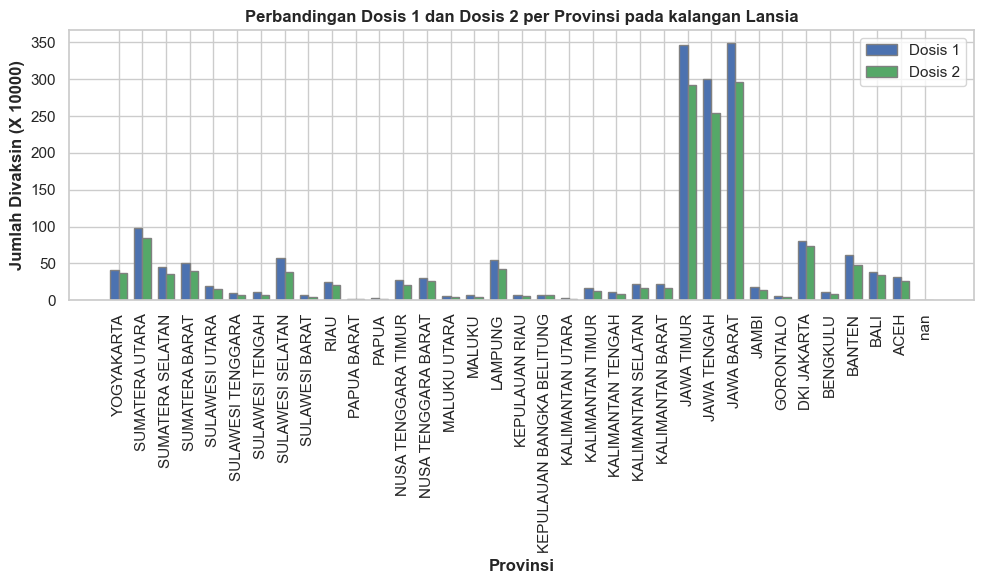

In [119]:
# Menggabungkan 2 data berdasaarkan pada provinsi_sasaran
merged_data = pd.merge(va1, va2, on='provinsi_sasaran')

# Membuat grafik antara data1 (Vaksin dosis 1) dengan data2 (Vaksin dosis 2)
plt.figure(figsize=(10, 6))

# Mengatur grafik bar
bar_width = 0.35
r1 = range(len(merged_data['provinsi_sasaran']))
r2 = [x + bar_width for x in r1]

# Membuat grafik bar
plt.bar(r1, merged_data['divaksin_1']/10000, color='b', width=bar_width, edgecolor='grey', label='Dosis 1')
plt.bar(r2, merged_data['divaksin_2']/10000, color='g', width=bar_width, edgecolor='grey', label='Dosis 2')

# Menambahkan judul dan label
plt.xlabel('Provinsi', fontweight='bold')
plt.ylabel('Jumlah Divaksin (X 10000)', fontweight='bold')
plt.title('Perbandingan Dosis 1 dan Dosis 2 per Provinsi pada kalangan Lansia di Indonesia', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(merged_data['provinsi_sasaran']))], merged_data['provinsi_sasaran'], rotation=90)

# Menambahkan legenda
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

## COVID-19 New Cases and Testing Data in Indonesia

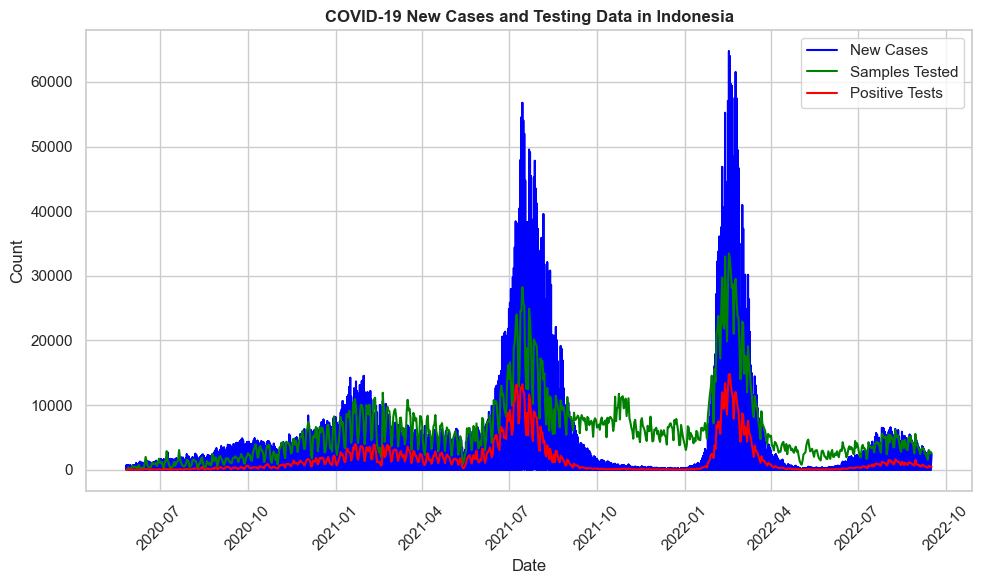

In [127]:
# Melakukan pembersihan data dan mengkonversikannya agar bisa di gabungkan
bor['Date'] = pd.to_datetime(bor['Date'])
pcr['tanggal'] = pd.to_datetime(pcr['tanggal'])

# melakukan gabung data
merged_df = pd.merge(bor, pcr, left_on='Date', right_on='tanggal', how='inner')

# Cari kolom yang relevan dengan 2 data sebelumnya
plot_data = merged_df[['Date', 'New Cases', 'New Deaths', 'positif', 'jumlah_sampel']]

# Buat grafik datanya
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(plot_data['Date'], plot_data['New Cases'], label='New Cases', color='blue')
plt.plot(plot_data['Date'], plot_data['jumlah_sampel'], label='Samples Tested', color='green')
plt.plot(plot_data['Date'], plot_data['positif'], label='Positive Tests', color='red')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 New Cases and Testing Data in Indonesia', fontweight='bold')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Tampilkan datanya
plt.show()

Berikut adalah plot gabungan yang menunjukkan tren kasus COVID-19 baru, sampel yang diuji, dan hasil tes positif dari waktu ke waktu di Indonesia.

- Garis biru mewakili kasus baru yang terkonfirmasi.
- Garis hijau menunjukkan total jumlah sampel yang diuji.
- Garis merah menunjukkan jumlah tes positif yang terdeteksi.

## Jumlah Anak yang Kehilangan Orang Tua Karena COVID-19 di Kota Bandung Berdasarkan Kategori dan Jenis Kelamin di Tahun 2021

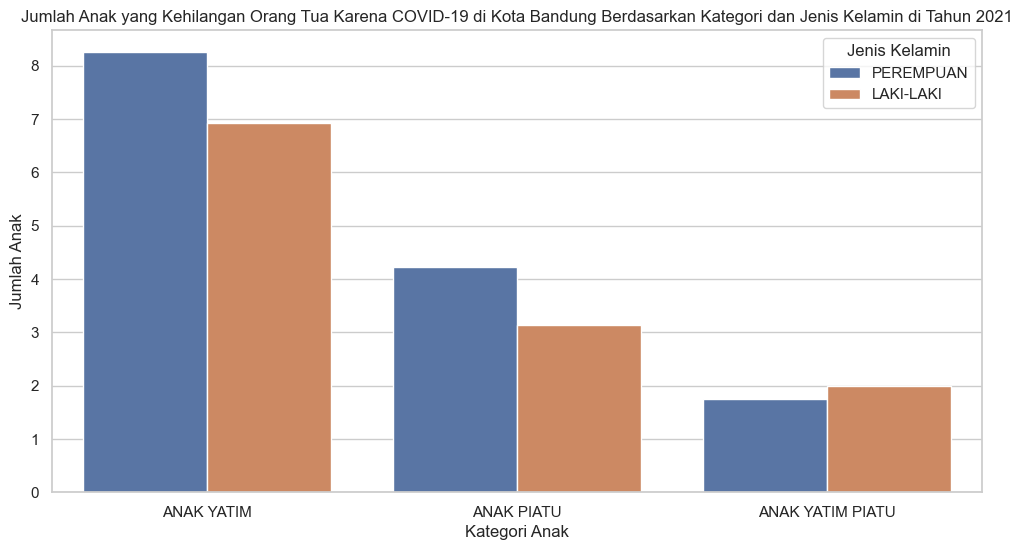

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual style
sns.set(style="whitegrid")

# Create a bar plot showing the number of children by category and gender for each year
plt.figure(figsize=(12, 6))
sns.barplot(cvd, x='kategori_anak', y='jumlah_anak', hue='jenis_kelamin', errorbar=None)

# Customize the plot
plt.title('Jumlah Anak yang Kehilangan Orang Tua Karena COVID-19 di Kota Bandung Berdasarkan Kategori dan Jenis Kelamin di Tahun 2021')
plt.xlabel('Kategori Anak')
plt.ylabel('Jumlah Anak')
plt.legend(title='Jenis Kelamin')

# Display the plot
plt.show()

## Perbandingan Penerimaan Dosis Vaksin Covid-19 pada Masyarakat Umum dan Anak-Anak per Provinsi di Indonesia

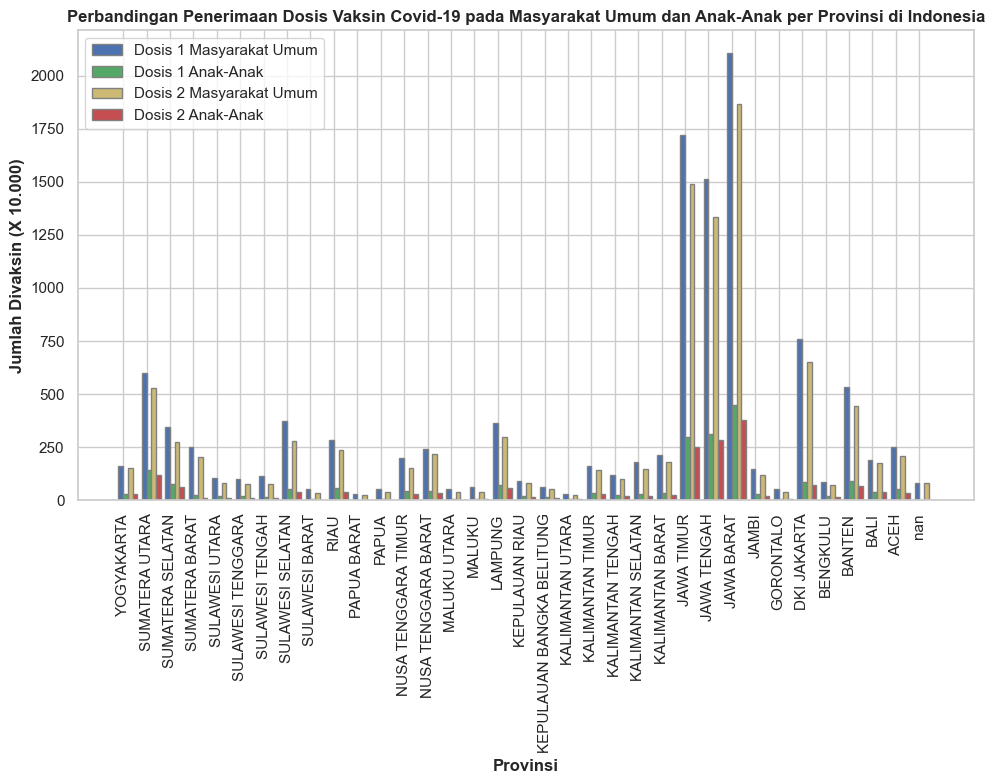

In [120]:
# Menggabungkan 4 dataframe berdasarkan pada 'provinsi_sasaran'
masyarakat_umum = pd.merge(vm1, vm2, on='provinsi_sasaran')
anak_anak = pd.merge(vn1, vn2, on='provinsi_sasaran')
merge_data = pd.merge(masyarakat_umum, anak_anak, on='provinsi_sasaran')

plt.figure(figsize=(10, 8))

# Mengatur grafik bar
bar_width = 0.2
r1 = range(len(merge_data['provinsi_sasaran']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Membuat grafik bar
plt.bar(r1, merge_data['divaksin_1_x']/10000, color='b', width=bar_width, edgecolor='grey', label='Dosis 1 Masyarakat Umum')
plt.bar(r2, merge_data['divaksin_1_y']/10000, color='g', width=bar_width, edgecolor='grey', label='Dosis 1 Anak-Anak')
plt.bar(r3, merge_data['divaksin_2_x']/10000, color='y', width=bar_width, edgecolor='grey', label='Dosis 2 Masyarakat Umum')
plt.bar(r4, merge_data['divaksin_2_y']/10000, color='r', width=bar_width, edgecolor='grey', label='Dosis 2 Anak-Anak')

# Menambahkan judul dan label
plt.xlabel('Provinsi', fontweight='bold')
plt.ylabel('Jumlah Divaksin (X 10.000)', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(merge_data['provinsi_sasaran']))], merge_data['provinsi_sasaran'], rotation=90)
plt.title('Perbandingan Penerimaan Dosis Vaksin Covid-19 pada Masyarakat Umum dan Anak-Anak per Provinsi di Indonesia', fontweight='bold')

# Menambahkan legenda
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

## ANALISIS

Pada data terlihat bahwa pada daerah Jawa (Jawa Barat, Jawa Tengah, dan Jawa Timur) memiliki jumlah penerima vaksin yang cenderung lebih banyak dibandingkan provinsi lainnya.

Untuk perbandingan antara penerima dari kalangan Masyarakat Umum dan kalangan Anak-Anak, pada semua provinsi cenderung penerima anak-anak lebih sedikit menerima vaksin dibandingkan dengan masyarakat umum. Hal ini kemungkinan besar disebabkan karena walaupun anak-anak sudah dapat menerima vaksin, mereka belum disarankan untuk menerima vaksin.

## Kasus Harian Covid-19 di Jawa Barat dari tahun 2020 hingga 2023

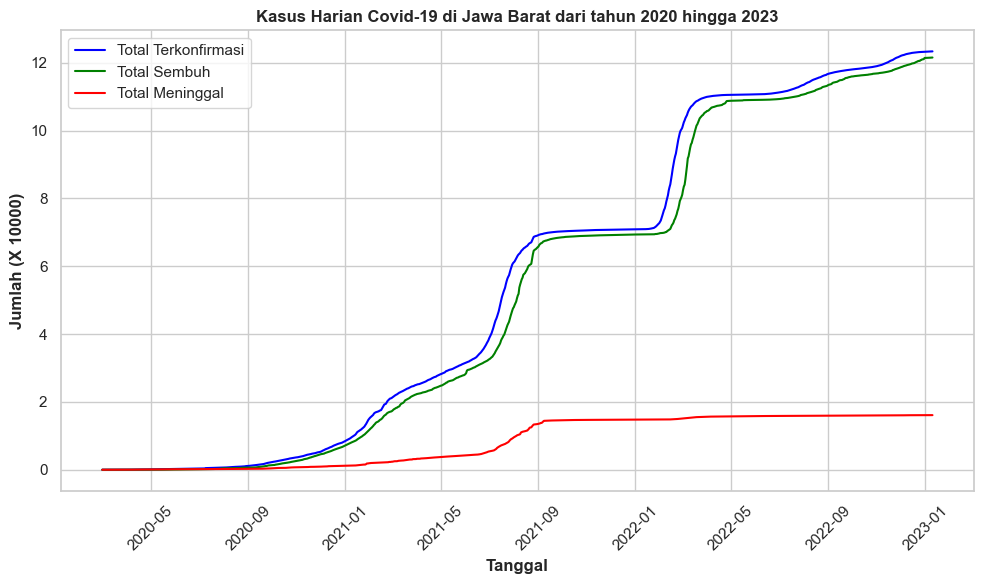

In [131]:
# Melakukan pengubahan data menjadi format datetime
kth['tanggal'] = pd.to_datetime(kth['tanggal'])

# Membuat grafik untuk data kth
plt.figure(figsize=(10, 6))
plt.plot(kth['tanggal'], kth['total_konfirmasi']/100000, label='Total Terkonfirmasi', color='blue')
plt.plot(kth['tanggal'], kth['sembuh']/100000, label='Total Sembuh', color='green')
plt.plot(kth['tanggal'], kth['meninggal']/10000, label='Total Meninggal', color='red')

plt.xlabel('Tanggal', fontweight='bold')
plt.ylabel('Jumlah (X 10000)', fontweight='bold')
plt.title('Kasus Harian Covid-19 di Jawa Barat dari tahun 2020 hingga 2023', fontweight='bold')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan data
plt.show()